<a href="https://colab.research.google.com/github/Richie7x/Major-Project/blob/main/COVID_19_PANDEMIC_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#Importing neccessary libraries

import pandas as pd #------------------------------------------------------------------For working with datasets as dataframes
import matplotlib.pyplot as plt #------------------------------------------------------Plotting the dataset values on a graph
from fbprophet import Prophet #--------------------------------------------------------Forecasting graph

- **COLLECTING AND PREPROCESSING DATA**

In [68]:
df = pd.read_csv('/content/drive/MyDrive/DS/DS-MAJOR/owid-covid-data.csv')
#Dataset can also be fetched from the source url 
#df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

df=df.fillna("00") #-------------------------------------------------------------------Filling NULLS with literals
df = df[['date','location','total_cases','new_cases',
         'total_deaths','new_deaths','total_vaccinations','people_vaccinated']] #------Further slicing the dataframe by columns

df_clean = df.loc[df['location'] == "India"] #-----------------------------------------Slicing data as per forecasting requirements 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 42073 to 42601
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                529 non-null    object
 1   location            529 non-null    object
 2   total_cases         529 non-null    object
 3   new_cases           529 non-null    object
 4   total_deaths        529 non-null    object
 5   new_deaths          529 non-null    object
 6   total_vaccinations  529 non-null    object
 7   people_vaccinated   529 non-null    object
dtypes: object(8)
memory usage: 37.2+ KB


In [69]:
#Further dividing the data into required dataframes and renaming columns as required by FbProphet

df_active = df_clean[['date','new_cases']] #-----------------------------------------------Dataframe for new cases wrt date
df_active =df_active.rename(columns={df_active.columns[0]:'ds', df_active.columns[1]:'y'})

df_deaths = df_clean[['date','total_deaths']] #----------------------------------------------Dataframe for total deaths wrt date
df_deaths =df_deaths.rename(columns={df_deaths.columns[0]:'ds', df_deaths.columns[1]:'y'})

df_vacc = df_clean[['date','total_vaccinations']] #------------------------------------------Dataframe for total
df_vacc =df_vacc.rename(columns={df_vacc.columns[0]:'ds', df_vacc.columns[1]:'y'})

datalist = [df_active, df_deaths, df_vacc] #-------------------------------------------------List containing dataframes

for dataframe in  datalist: #----------------------------------------------------------------Iterating through each dataframe 
  dataframe['ds'] = pd.to_datetime(dataframe['ds'])                                          #Coverting date values into required date-time format
  dataframe['y'] = dataframe['y'].astype(int)                                                #Converting column values into integer type

- **DATA PLOT**

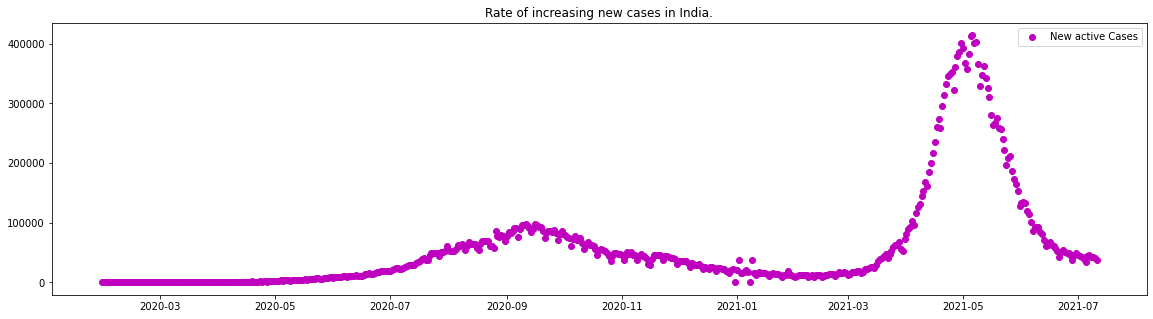

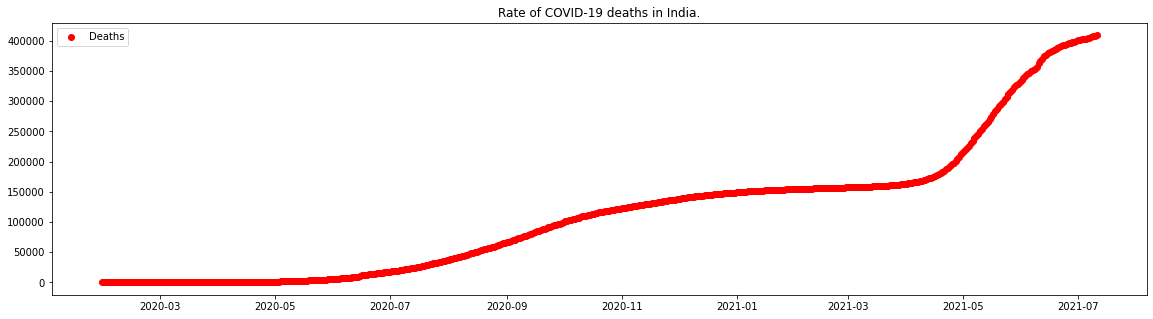

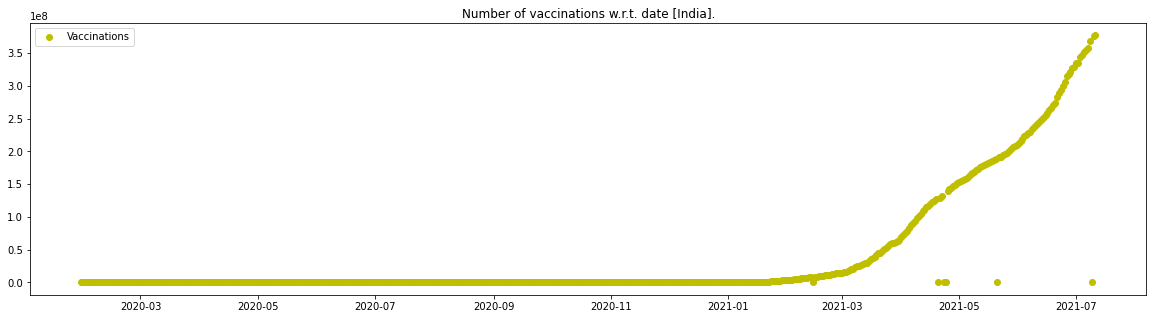

In [70]:
#Plotting points for Active Cases (in India)
plt.figure(figsize=(19.62,5))
plt.scatter(df_active['ds'],df_active['y'],c='m')
plt.title("Rate of increasing new cases in India.")
plt.legend(['New active Cases'])

#Plotting points for Deaths caused by COVID-19 (in India)
plt.figure(figsize=(19.62,5))
plt.scatter(df_deaths['ds'],df_deaths['y'],c='r')
plt.title("Rate of COVID-19 deaths in India.")
plt.legend(['Deaths'])

#Plotting points for total people vaccinated per date (in India)
plt.figure(figsize=(20,5))
plt.scatter(df_vacc['ds'],df_vacc['y'],c='y')
plt.title("Number of vaccinations w.r.t. date [India].")
plt.legend(['Vaccinations'])

- **FORECASTING DATA (30 DAYS)**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


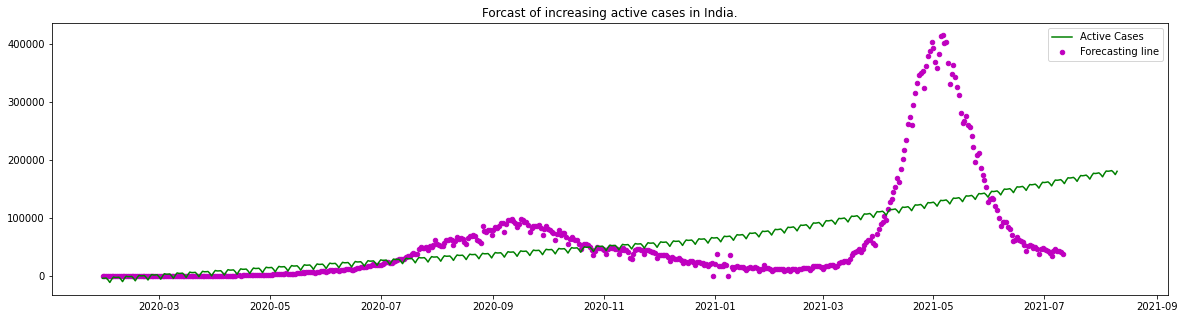

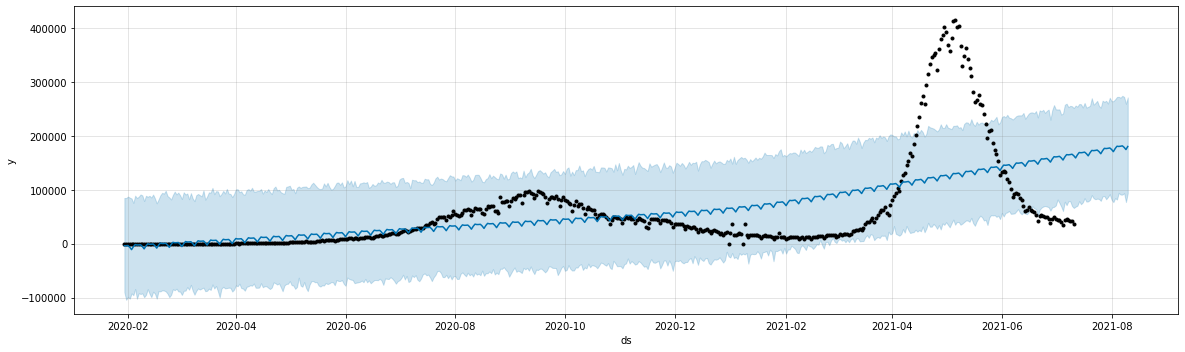

In [71]:
#FORECASTING FOR ACTIVE CASES 

model_active = Prophet() #-------------------------------------------------Instatiating an Fbprophet object for forecasting new active cases
model_active.fit(df_active) #----------------------------------------------Fitting dataframe into object model
x = model_active.make_future_dataframe(periods=30,freq='D')
forecast = model_active.predict(x) #---------------------------------------Creating forecast dataframe

plt.figure(figsize=(20,5)) #-----------------------------------------------Plotting datapoints
plt.scatter(df_active['ds'],df_active['y'],s=20,c='m')
plt.plot(forecast['ds'],forecast['yhat'],c='g')
plt.title("Forcast of increasing active cases in India.")
plt.legend(['Active Cases','Forecasting line'])
model_active.plot(forecast,figsize=(16.56,5));

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


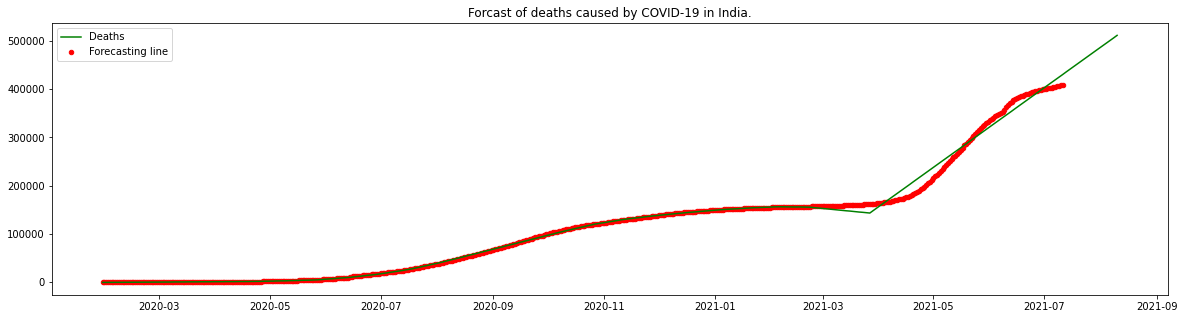

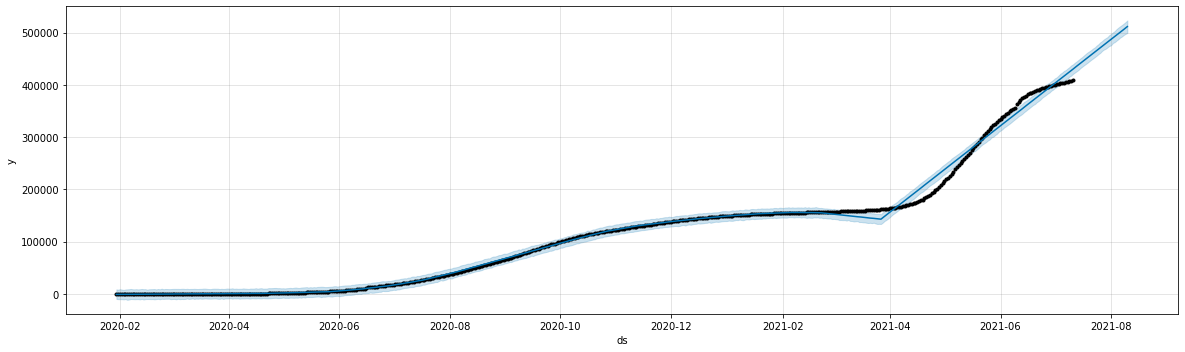

In [72]:
#FORECASTING FOR DEATHS CAUSED BY COVID-19 

model_deaths = Prophet() #---------------------------------------------Instantiating FbProphet object for forecasting number of deaths
model_deaths.fit(df_deaths) #------------------------------------------Fitting the dataframe into the model object
x = model_deaths.make_future_dataframe(periods=30,freq='D')
forecast = model_deaths.predict(x) #-----------------------------------Creating Forecast dataframe

plt.figure(figsize=(20,5)) #-------------------------------------------Plotting datapoints
plt.scatter(df_deaths['ds'],df_deaths['y'],s=20,c='r')
plt.plot(forecast['ds'],forecast['yhat'],c='g')
plt.title("Forcast of deaths caused by COVID-19 in India.")
plt.legend(['Deaths','Forecasting line'])
model_deaths.plot(forecast,figsize=(16.56,5));

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


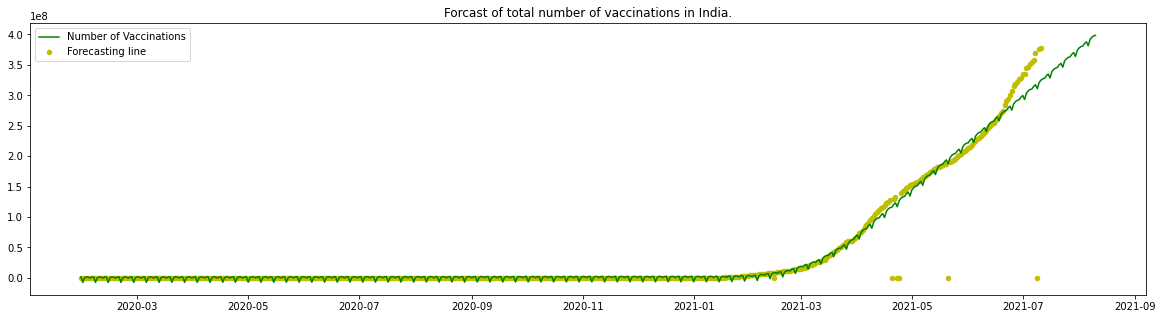

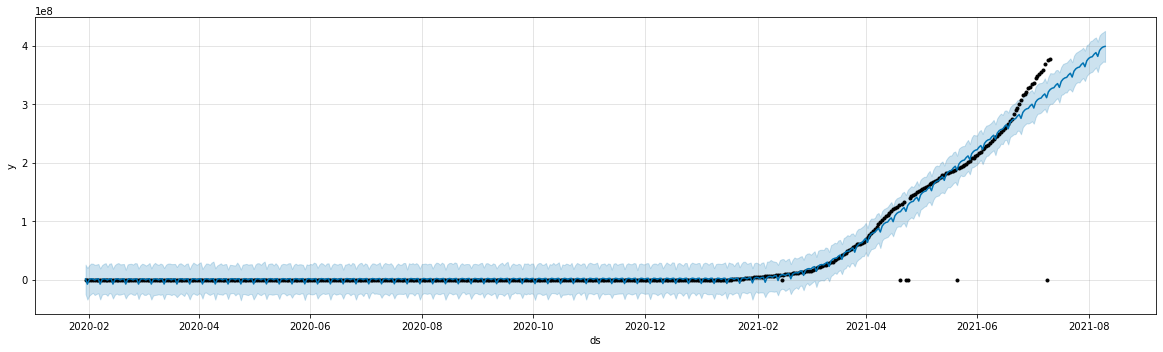

In [73]:
#FORECASTING FOR TOTAL NUMBER OF VACCINATIONS

model_vacc = Prophet() #-----------------------------------------------Instantiating FbProphet object for forecasting number of vaccinations
model_vacc.fit(df_vacc) #----------------------------------------------Fitting the dataframe into the model object
x = model_vacc.make_future_dataframe(periods=30,freq='D')
forecast = model_vacc.predict(x) #-------------------------------------Creating Forecast dataframe

plt.figure(figsize=(20,5)) #-------------------------------------------Plotting datapoints
plt.scatter(df_vacc['ds'],df_vacc['y'],s=20,c='y')
plt.plot(forecast['ds'],forecast['yhat'],c='g')
plt.title("Forcast of total number of vaccinations in India.")
plt.legend(['Number of Vaccinations','Forecasting line'])
model_vacc.plot(forecast,figsize=(16.256,5));

- **ANALYSIS REPORT**

In [74]:
df_latest = df.loc[df['date'] == df['date'].max()].reset_index(drop=True) #-----------------------Creating dataframe with the latest date 

continents = ['Africa','Asia','Europe','North America','South America','World','European Union']
for continent in continents:
  index = df_latest[ df_latest['location'] == continent ].index
  df_latest.drop(index, inplace=True) #------------------------------------------------------------Droping rows containing data for continents

typecast = df_latest.columns[2:]
for column in typecast:
  df_latest[column] = df_latest[column].astype(int) #----------------------------------------------Typecasting object type into integer type
  

#ANALYSIS FOR TOTAL NUMBER OF CASES---------------------------------------------------------------------------------------------------------------------#
dfa = df_latest[['location','total_cases']].reset_index(drop=True)
indexes = dfa[dfa['total_cases'] == 0 ].index
dfa.drop(indexes, inplace=True)
dfa = dfa.reset_index(drop=True)


maxval = dfa['total_cases'].idxmax() #------------Fetching index of maximum value from total cases
minval = dfa['total_cases'].idxmin() #------------Fetching index of minimum value from total cases

print('\n1. Country with highest number of cases : ' + (dfa.iloc[maxval,:][0]))
print('   Number of case(s) in ' + (dfa.iloc[maxval,:][0]) + ' : ' + str(dfa.iloc[maxval,:][1]))
print('\n')
print('2. Country with least number of cases : ' + (dfa.iloc[minval,:][0]))
print('   Number of case(s) in ' + (dfa.iloc[minval,:][0]) + ' : ' + str(dfa.iloc[minval,:][1]))
print('____________________________________________________________________')


#ANALYSIS FOR TOTAL NUMBER OF DEATHS-------------------------------------------------------------------------------------------------------------------#
dfd = df_latest[['location','total_deaths']].reset_index(drop=True)
indexes = dfd[dfd['total_deaths'] == 0 ].index
dfd.drop(indexes, inplace=True)
dfd = dfd.reset_index(drop=True)

maxval = dfd['total_deaths'].idxmax() #------------Fetching index of maximum value from total deaths
minval = dfd['total_deaths'].idxmin() #------------Fetching index of minimum value from total deaths

print('\n3. Country with highest number of deaths : ' + (dfd.iloc[maxval,:][0]))
print('   Number of death(s) in ' + (dfd.iloc[maxval,:][0]) + ' : ' + str(dfd.iloc[maxval,:][1]))
print('\n')
print('4. Country with least number of deaths : ' + (dfd.iloc[minval,:][0]))
print('   Number of death(s) in ' + (dfd.iloc[minval,:][0]) + ' : ' + str(dfd.iloc[minval,:][1]))
print('____________________________________________________________________')


#ANALYISIS FOR TOTAL NUMBER OF VACCINATIONS------------------------------------------------------------------------------------------------------------#
dfv = df_latest[['location','total_vaccinations']].reset_index(drop=True)
indexes = dfv[dfv['total_vaccinations'] == 0 ].index
dfv.drop(indexes, inplace=True)
dfv = dfv.reset_index(drop=True)

maxval = dfv['total_vaccinations'].idxmax() #------------Fetching index of maximum value from total number of vaccinations
minval = dfv['total_vaccinations'].idxmin() #------------Fetching index of minimum value from total number of vaccinations

print('\n5. Country with highest number of vaccinations : ' + (dfv.iloc[maxval,:][0]))
print('   Number of death(s) in ' + (dfv.iloc[maxval,:][0]) + ' : ' + str(dfv.iloc[maxval,:][1]))
print('\n')
print('6. Country with least number of vaccinations : ' + (dfv.iloc[minval,:][0]))
print('   Number of death(s) in ' + (dfv.iloc[minval,:][0]) + ' : ' + str(dfv.iloc[minval,:][1]))



1. Country with highest number of cases : United States
   Number of case(s) in United States : 33853948


2. Country with least number of cases : Micronesia (country)
   Number of case(s) in Micronesia (country) : 1
____________________________________________________________________

3. Country with highest number of deaths : United States
   Number of death(s) in United States : 607156


4. Country with least number of deaths : Bhutan
   Number of death(s) in Bhutan : 1
____________________________________________________________________

5. Country with highest number of vaccinations : China
   Number of death(s) in China : 1382482000


6. Country with least number of vaccinations : Faeroe Islands
   Number of death(s) in Faeroe Islands : 56825


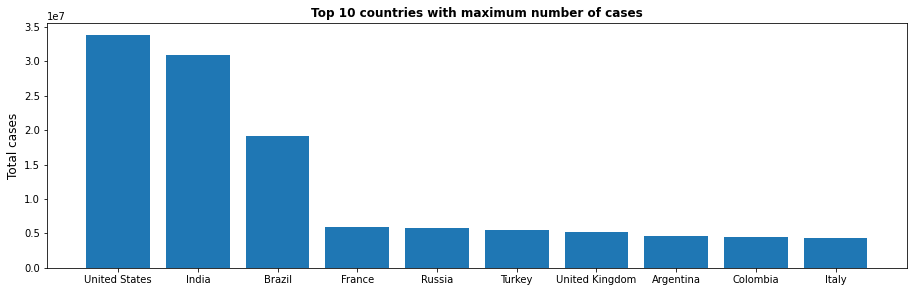

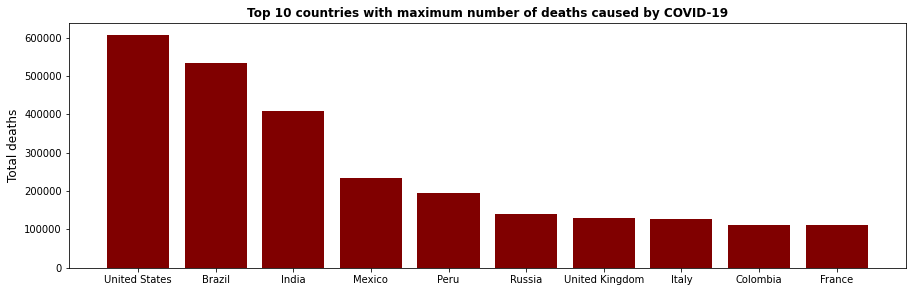

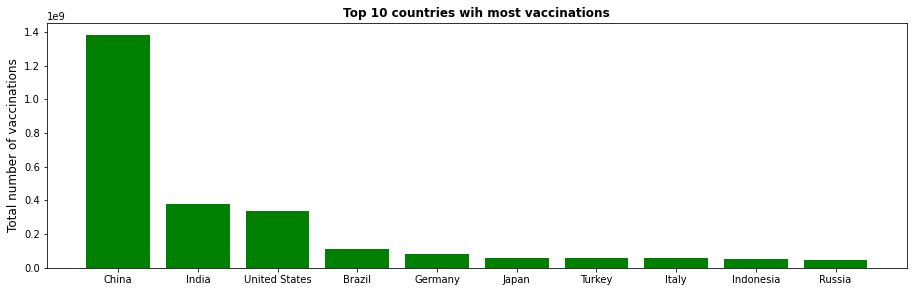

In [75]:
dfa_bar = dfa.sort_values(by = 'total_cases', ascending = 0).head(10)
dfd_bar = dfd.sort_values(by = 'total_deaths', ascending = 0).head(10)
dfv_bar = dfv.sort_values(by = 'total_vaccinations', ascending = 0).head(10)

plt.figure(figsize =(15.4, 4.5))
plt.bar(dfa_bar['location'],dfa_bar['total_cases'])
plt.ylabel("Total cases", fontsize=12)
plt.title("Top 10 countries with maximum number of cases",fontweight='bold')
plt.show()

print('\n')

plt.figure(figsize =(15, 4.5))
plt.bar(dfd_bar['location'],dfd_bar['total_deaths'], color='maroon')
plt.ylabel("Total deaths", fontsize=12)
plt.title("Top 10 countries with maximum number of deaths caused by COVID-19",fontweight='bold')
plt.show()

print('\n')

plt.figure(figsize =(15.4, 4.5))
plt.bar(dfv_bar['location'],dfv_bar['total_vaccinations'], color='green')
plt.ylabel("Total number of vaccinations", fontsize=12)
plt.title("Top 10 countries wih most vaccinations",fontweight='bold')
plt.show()